In [1]:
import numpy as np

In [2]:
class SVM:
    def __init__(self, lr=0.01, epochs=10000, C=0.5):
        self.lr = lr
        self.epochs = epochs
        self.C = C

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        self.b = 0
        y = np.array([1 if label == 1 else -1 for label in y])
        
        n = y.shape[0]

        for _ in range(self.epochs):
            dw = np.zeros_like(self.w)
            db = 0

            for i in range(n):
                if (y[i] * (np.dot(X[i], self.w) + self.b)) < 1:
                    dw = dw - self.C * y[i] * X[i]
                    db = db - self.C * y[i]

            self.w = self.w - self.lr * dw
            self.b = self.b - self.lr * db
    
    def predict(self, X):
        return [1 if (np.dot(X[i], self.w) + self.b) >= 0 else -1 for i in range(X.shape[0])]

In [3]:
X = np.array([[1.7606, -1.6402],
     [1.1556,  0.4826],
     [0.5243, -0.6675],
     [1.0260, -0.8620],
     [0.5337, -0.6402],
     [0.6692,  1.8840],
     [1.0895,  0.7105],
     [0.3719,  1.6948],
     [2.3394, -2.2632],
     [0.7709,  0.9314],
     [1.0347,  1.1996],
     [2.2541, -2.3520],
     [0.8301,  0.4806]])
y = np.array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1])

model = SVM()
model.fit(X, y)

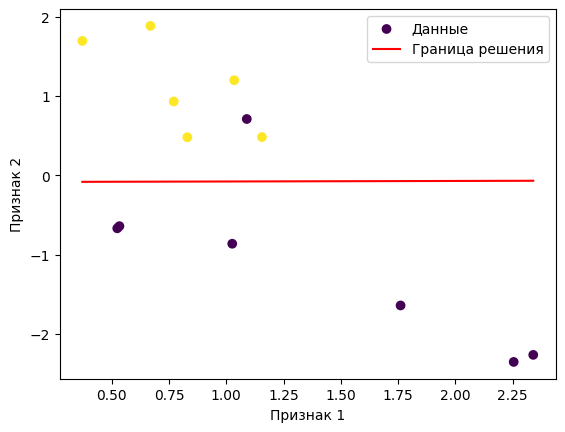

In [4]:
import numpy as np
import matplotlib.pyplot as plt

w1, w2, b = model.w[0], model.w[1], model.b

x1 = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
x2 = -(w1 * x1 + b) / w2

plt.scatter(X[:, 0], X[:, -1], c=y, cmap='viridis', label='Данные')
plt.plot(x1, x2, color='red', label='Граница решения')
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.legend()
plt.show()